# Objetivo

<span style="color: black; font-family: Arial; font-size: 20px;">
O objetivo desse estudo é analisar e gerar insights a partir dos dados históricos de vendas, avaliações, gêneros e plataformas de videogames da empresa Ice, a fim de contribuir em uma campanha publicitária da empresa para o ano de 2017.

# Carregando os dados

In [132]:
# Carregando todas as bibliotecas
from scipy import stats as st
import numpy as np
import pandas as pd
from googletrans import Translator
import nbformat
from math import factorial
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [133]:
# Carregando o Dataframe
df_games = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\ice-games-analysis\games.csv")
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Preparando os dados

In [135]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [136]:
# Transformando os nomes das colunas em minúsculos
new_col_names=[]
for old_name in df_games.columns:
    name_lowered=old_name.lower()
    new_col_names.append(name_lowered)
df_games.columns=new_col_names
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [137]:
# Convertendo os dados para os tipos necessários
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [138]:
# Tratando valores ausentes
print(df_games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [139]:
# Filtrando por valores 'NaN' nas colunas 'critic_score', 'user_score' e 'rating' para saber quais jogos estão com avaliações ausentes
mutual_nan = df_games[(df_games['critic_score'].isna()) & (df_games['user_score'].isna()) & (df_games['rating'].isna())]
mutual_nan.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [140]:
# Preenchendo os valores ausentes na coluna 'year_of_release' para 0 e transformando o seu tipo para 'int'.
df_games['year_of_release'] = df_games['year_of_release'].fillna('0').astype('int')
print(df_games.isna().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [141]:
# Verificando e tratando valores duplicados
print(df_games.duplicated().sum())

0


In [142]:
# Adicionando a coluna 'total_sales' no dataframe
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


In [143]:
# Filtrando apenas por jogos que foram lançadas anos válidos
games_filtered = df_games[df_games['year_of_release'] != 0]

# Análise de dados

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando quantos jogos foram lançados a cada ano.

In [146]:
games_per_year = games_filtered.groupby('year_of_release')['name'].count()
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

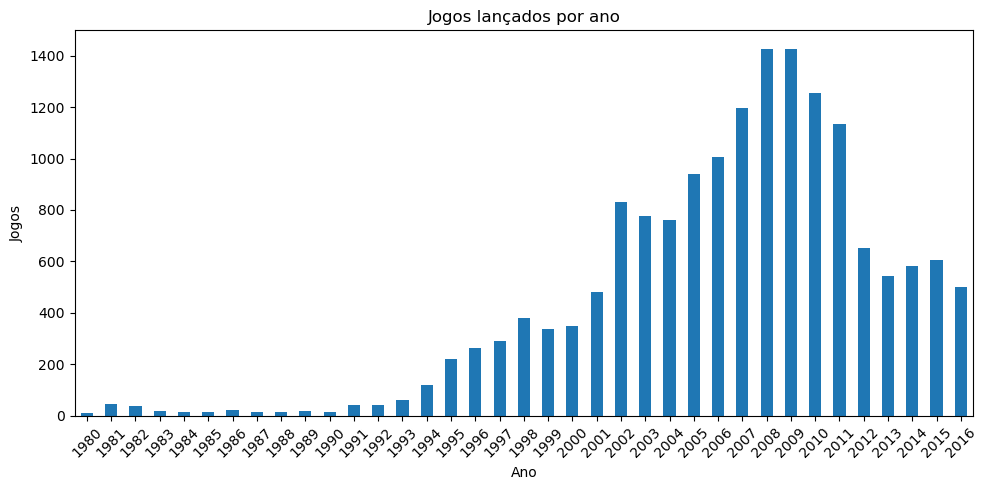

In [147]:
games_per_year.plot(kind='bar', figsize=(10, 5), title='Jogos lançados por ano')
plt.xlabel('Ano')
plt.ylabel('Jogos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Nessa análise será escolhida apenas o período de tempo mais relevante para que a campanha publicitária de 2017 tenha o maior efeito possível. Portanto serão usadas na análise apenas os dados dos últimos anos.

In [149]:
# Filtrando os dados apenas para jogos dos últimos anos
df_games_filtered = df_games[df_games['year_of_release'].between(2012, 2017)]

<span style="color: blue; font-family: Arial; font-size: 20px;">
Selecionando as 5 plataformas com maiores vendas

In [151]:
top_sales_per_platform = df_games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
top_sales_per_platform

platform
PS4     265.79
PS3     245.53
X360    216.14
3DS     185.74
XOne    145.05
Name: total_sales, dtype: float64

In [152]:
mean_sales_per_platform = df_games_filtered.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
mean_sales_per_platform

platform
X360    0.740205
PS4     0.678036
Wii     0.606667
XOne    0.587247
WiiU    0.518639
PS3     0.498032
3DS     0.469040
DS      0.381935
PC      0.227520
PSV     0.105547
PSP     0.063699
Name: total_sales, dtype: float64

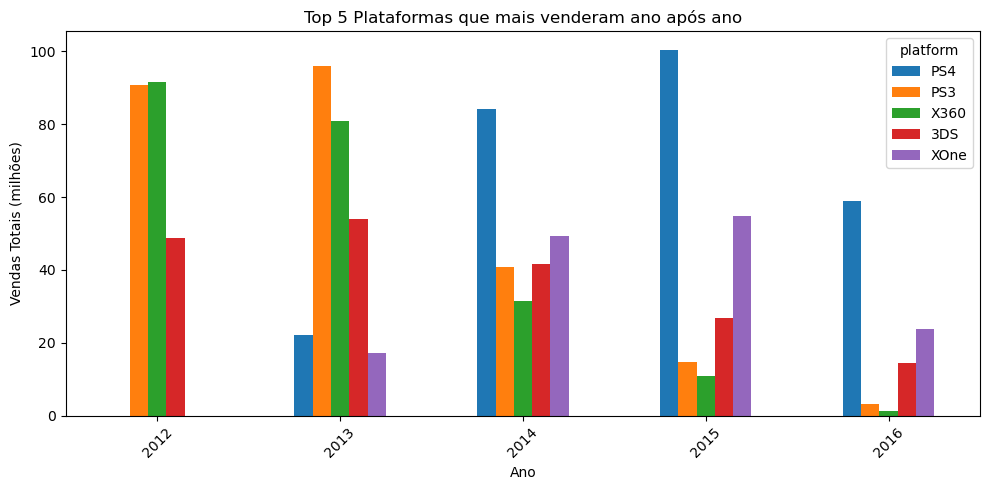

In [153]:
# Construindo uma distribuição para mostrar as 5 plataformas que mais venderam ano após ano
sales_year_platform = df_games_filtered.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top5_platforms = top_sales_per_platform.index
sales_year_platform_top5 = sales_year_platform[top5_platforms]

# Plotando um gráfico
sales_year_platform_top5.plot(kind='bar', figsize=(10, 5), title='Top 5 Plataformas que mais venderam ano após ano')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(0.0, 2.0)

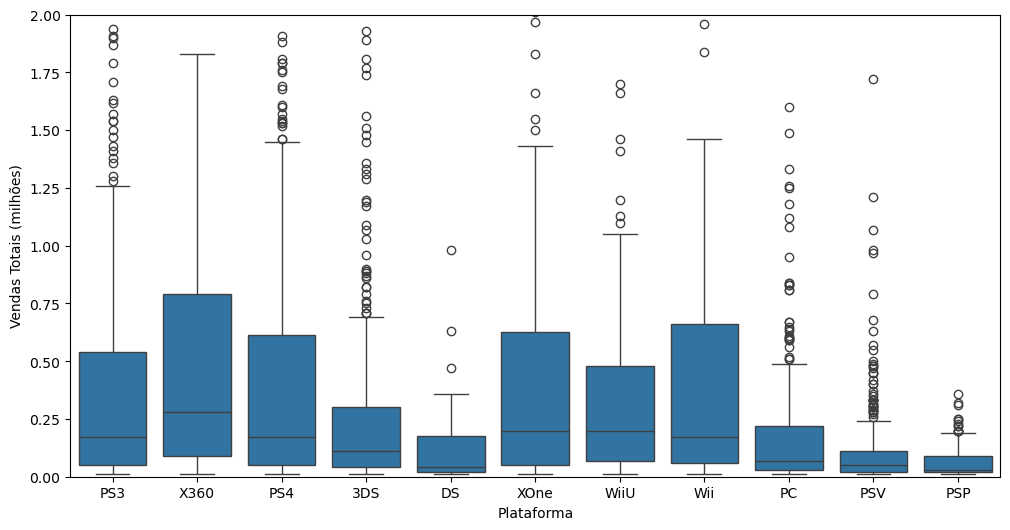

In [154]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_games_filtered, x='platform', y='total_sales')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (milhões)')
plt.ylim(0,2)

<span style="color: black; font-family: Arial; font-size: 20px;">
Das 5 plataformas selecionadas, a que está liderando em vendas é o PS4, seguido pelo PS3. 

- A plataforma que mais cresceu ano após ano foi o PS4, mostrando um aumento gradativo e apenas caindo em vendas no ano de 2016.

- As plataformas que mais diminuiram em vendas ano após ano foram o X360 e o PS3.

- A plataforma mais potencialmente lucrativa é o PS4.

- X360 é a plataforma com maior venda média.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando os gêneros mais vendidos

In [157]:
top_profit_genre = df_games_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5)
top_profit_genre

genre
Action          389.98
Shooter         267.47
Role-Playing    177.97
Sports          158.63
Misc             77.37
Name: total_sales, dtype: float64

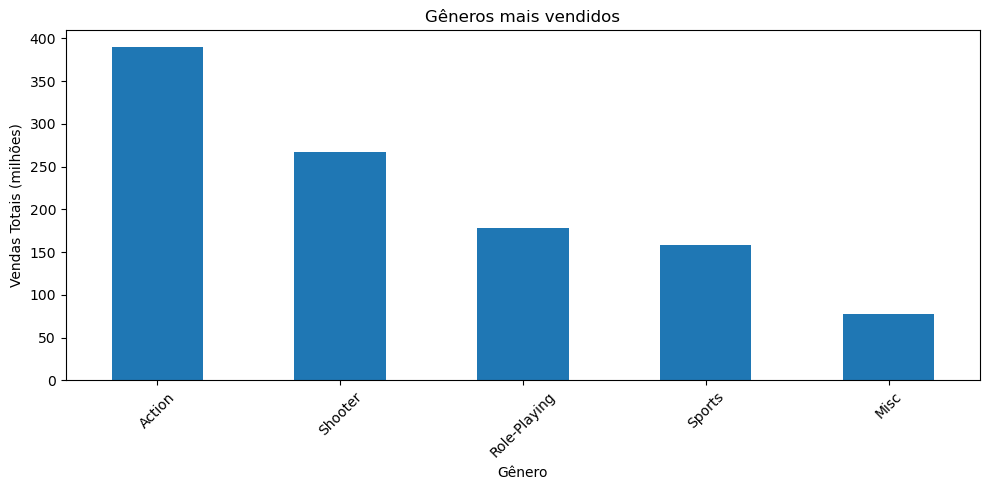

In [158]:
top_profit_genre.plot(kind='bar', figsize=(10, 5), title='Gêneros mais vendidos')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Dentro dos 5 principais gêneros, o mais vendido é o 'Action' e o menos vendido é o 'Misc'.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando as 5 principais plataformas por região.

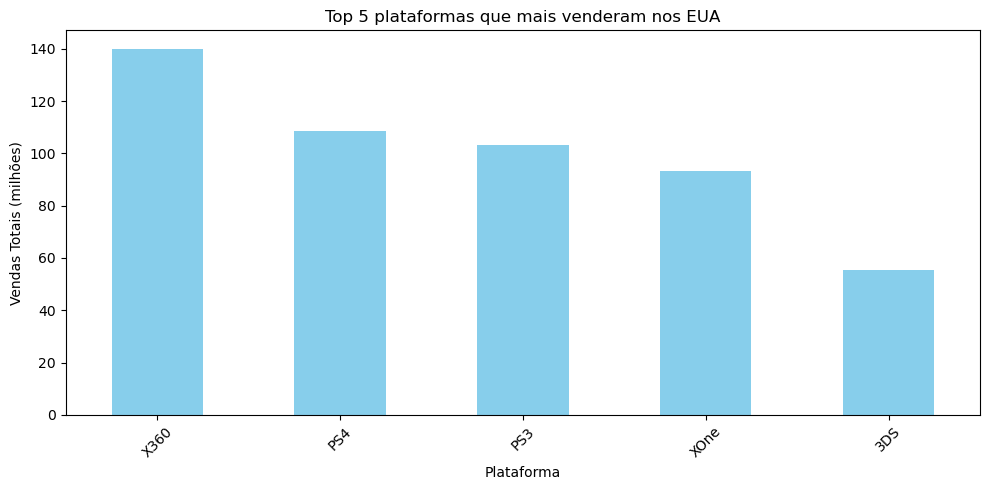

In [161]:
# 5 principais plataformas liderando em vendas nos EUA
top_na_platforms = df_games_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

#Plotando um gráfico
top_na_platforms.plot(kind='bar', figsize=(10, 5), color='skyblue', title='Top 5 plataformas que mais venderam nos EUA')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

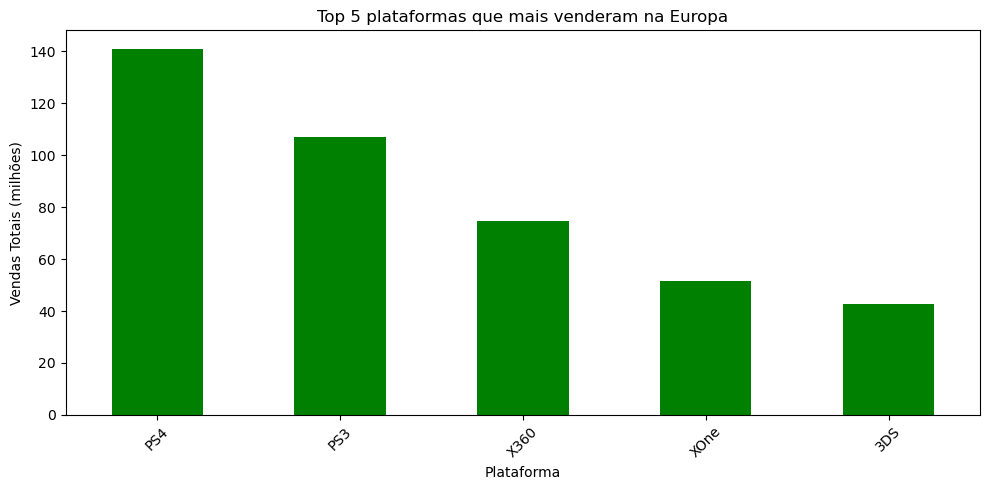

In [162]:
# 5 principais plataformas liderando em vendas na Europa
top_eu_platforms = df_games_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

#Plotando um gráfico
top_eu_platforms.plot(kind='bar', figsize=(10, 5), color='green', title='Top 5 plataformas que mais venderam na Europa')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

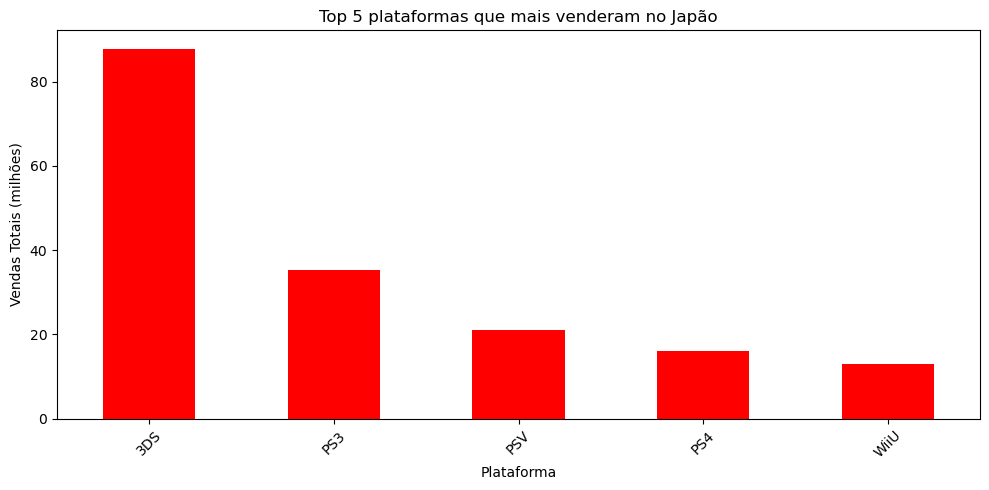

In [163]:
# 5 principais plataformas liderando em vendas no Japão
top_jp_platforms = df_games_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

#Plotando um gráfico
top_jp_platforms.plot(kind='bar', figsize=(10, 5), color='red', title='Top 5 plataformas que mais venderam no Japão')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
    
A plataforma X360 lidera em vendas nos EUA.

PS4 lidera em vendas na Europa.

3DS lidera em venda no Japão.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando as 5 principais plataformas por região.

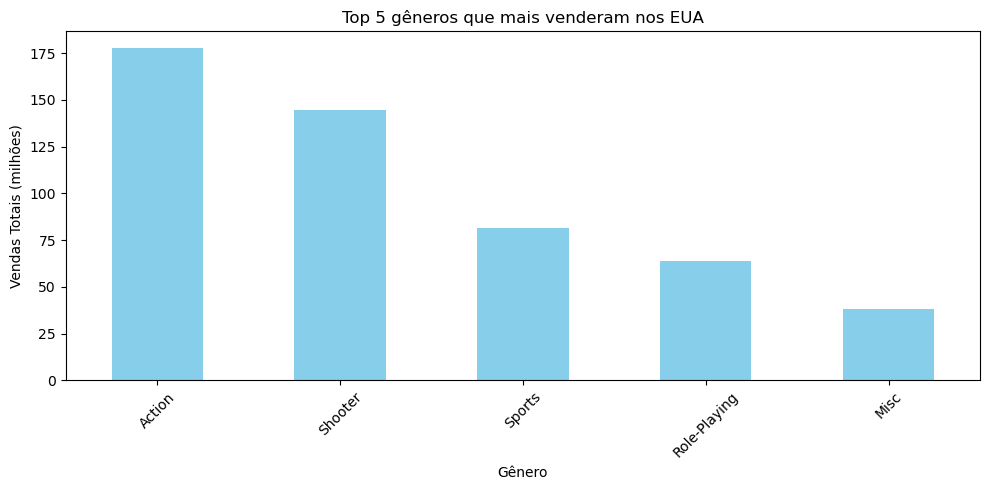

In [166]:
# 5 principais generos liderando em vendas nos EUA
top_na_genre = df_games_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

#Plotando um gráfico
top_na_genre.plot(kind='bar', figsize=(10, 5), color='skyblue', title='Top 5 gêneros que mais venderam nos EUA')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

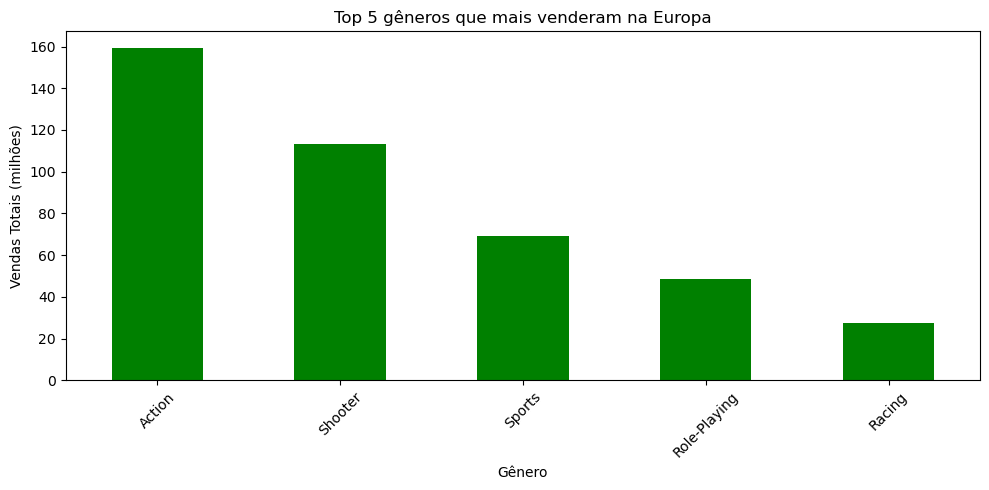

In [167]:
# 5 principais generos liderando em vendas na Europa
top_eu_genre = df_games_filtered.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

#Plotando um gráfico
top_eu_genre.plot(kind='bar', figsize=(10, 5), color='green', title='Top 5 gêneros que mais venderam na Europa')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

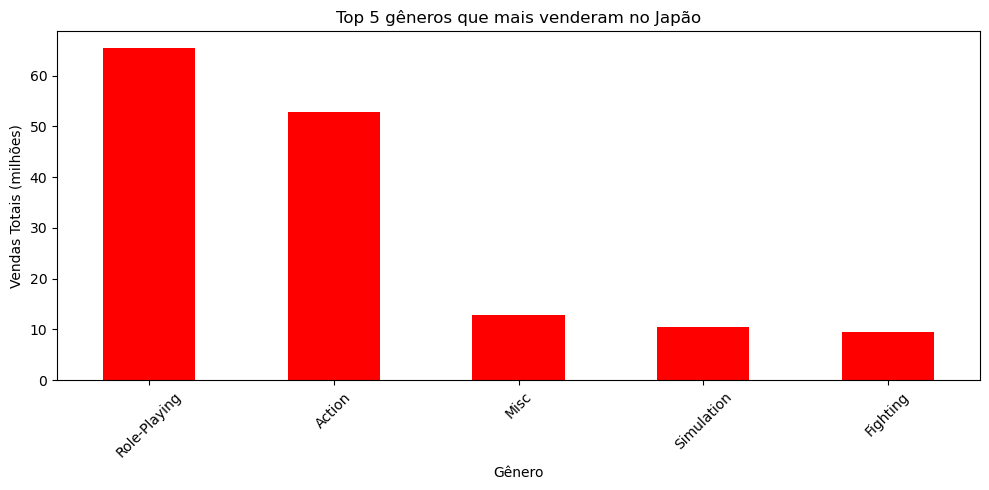

In [168]:
# 5 principais generos liderando em vendas no Japão
top_jp_genre = df_games_filtered.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

#Plotando um gráfico
top_jp_genre.plot(kind='bar', figsize=(10, 5), color='red', title='Top 5 gêneros que mais venderam no Japão')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
    
O gênero 'Action' é o mais vendido nos EUA e na Europa. No Japão o mais vendido é o 'Role-Playing'.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculando quais classificações indicativas de jogos mais venderam por região

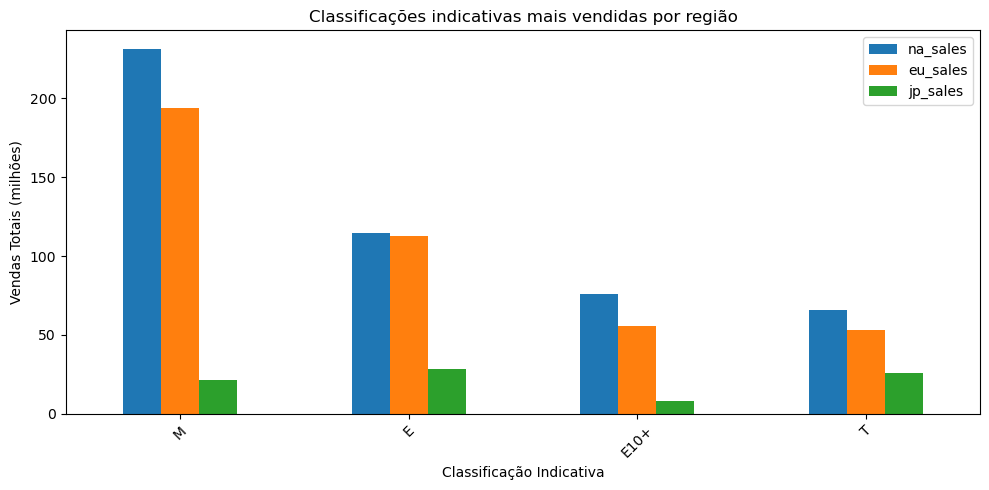

In [171]:
top_rating_sales = df_games_filtered.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum').sort_values(by='na_sales', ascending=False)

#Plotando um gráfico
top_rating_sales.plot(kind='bar', figsize=(10, 5), title='Classificações indicativas mais vendidas por região')
plt.xlabel('Classificação Indicativa')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
    
Jogos com classificação indicativa 'Mature' foram os que mais tiveram vendas.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Escolhendo a plataforma PS4 e calculando suas principais métricas

In [174]:
# Escolhendo a plataforma PS4 e filtrando-a
ps4_ratings = df_games_filtered[(df_games_filtered['critic_score'] > 0) & (df_games_filtered['user_score'] > 0) & (df_games_filtered['platform'] == 'PS4')].groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum().reset_index()
ps4_ratings.head()

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.12,45.0,5.9
1,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
2,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
3,PS4,Alien: Isolation,0.95,79.0,8.1
4,PS4,Angry Birds Star Wars,0.18,47.0,2.0


In [175]:
# Calculando a correlação das vendas totais de PS4 com a avaliações dos críticos
ps4_ratings['total_sales'].corr(ps4_ratings['critic_score'])

0.4052233666150137

In [176]:
# Calculando a correlação das vendas totais de PS4 com a avaliações dos usuários
ps4_ratings['total_sales'].corr(ps4_ratings['user_score'])

-0.032922870164094176

In [177]:
fig = px.scatter(
    ps4_ratings,
    x='critic_score',
    y='user_score',
    size='total_sales',
    color='platform',
    hover_name='name',
    title='Avaliação dos críticos VS Avaliação dos usuários (Plataforma PS4)',
    labels={
        'critic_score': 'Avaliação dos críticos',
        'user_score': 'Avaliação dos usuários',
        'total_sales': 'Vendas Totais'
    }
)
fig.show()

In [178]:
fig = px.scatter(
    ps4_ratings,
    x='critic_score',
    y='total_sales',
    color='platform',
    hover_name='name',
    title='Avaliação dos críticos VS Vendas totais (Plataforma PS4)',
    labels={
        'critic_score': 'Avaliação dos críticos',
        'total_sales': 'Vendas Totais'
    }
)
fig.show()

In [179]:
fig = px.scatter(
    ps4_ratings,
    x='user_score',
    y='total_sales',
    color='platform',
    hover_name='name',
    title='Avaliação dos usuários VS Vendas totais (Plataforma PS4)',
    labels={
        'user_score': 'Avaliação dos críticos',
        'total_sales': 'Vendas Totais'
    }
)
fig.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
    
A correlação das vendas totais dessa plataforma com as avaliações dos críticos é de aproximadamente 40%, mostrando-se bem alta.

'Grand Theft Auto V', além de ter sido o mais vendido, foi o jogo de PS4 mais bem avaliado tanto pelos críticos quanto pelos usuários.

# Teste de Hipóteses

<span style="color: blue; font-family: Arial; font-size: 20px;">
As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [183]:
# H0: As classificações médias dos usuários das plataformas Xbox One e PC não são as mesmas.
# HA: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [184]:
#Sample Xbox One
xbox_ratings = df_games_filtered[(df_games_filtered['user_score'] > 0) & (df_games_filtered['platform'] == 'XOne')].groupby(['platform', 'name'])['user_score'].sum().reset_index()

#Sample PC
pc_ratings = df_games_filtered[(df_games_filtered['user_score'] > 0) & (df_games_filtered['platform'] == 'PC')].groupby(['platform', 'name'])['user_score'].sum().reset_index()

alpha=0.05

if xbox_ratings['user_score'].var() == pc_ratings['user_score'].var():
    results = st.ttest_ind(xbox_ratings['user_score'], pc_ratings['user_score'],equal_var = True)
else:
    results = st.ttest_ind(xbox_ratings['user_score'], pc_ratings['user_score'],equal_var = False)
    
print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  0.5489537965134987
Não podemos rejeitar a hipótese nula


<span style="color: black; font-family: Arial; font-size: 20px;">
Através do valorp igual a aproximadamente 54%, não é possivel rejeitar a hipótese de que as classificações médias dos usuários das plataformas Xbox One e PC não são as mesmas.

<span style="color: blue; font-family: Arial; font-size: 20px;">
As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [187]:
# H0: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) não são diferentes.
# HA: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [188]:
#Sample Action
action_ratings = df_games_filtered[(df_games_filtered['user_score'] > 0) & (df_games_filtered['genre'] == 'Action')].groupby(['platform', 'name'])['user_score'].sum().reset_index()

#Sample Sports
sports_ratings = df_games_filtered[(df_games_filtered['user_score'] > 0) & (df_games_filtered['genre'] == 'Sports')].groupby(['platform', 'name'])['user_score'].sum().reset_index()

alpha=0.05

if action_ratings['user_score'].var() == sports_ratings['user_score'].var():
    results = st.ttest_ind(action_ratings['user_score'], sports_ratings['user_score'],equal_var = True)
else:
    results = st.ttest_ind(action_ratings['user_score'], sports_ratings['user_score'],equal_var = False)
    
print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  1.2626590345816187e-18
Rejeitamos a hipótese nula


<span style="color: black; font-family: Arial; font-size: 20px;">
Através do valorp igual a aproximadamente 126%, não é possivel rejeitar a hipótese de que as classificações médias dos usuários das plataformas Xbox One e PC não são as mesmas.

# Conclusões e recomendações

<span style="color: black; font-family: Arial; font-size: 20px;">

A análise apontou o **PS4**  como líder global de vendas e a plataforma mais promissora para investimento, com crescimento consistente até 2016. O **PS3** e o **X360** apresentaram queda contínua nas vendas, sendo que o X360, apesar da retração, ainda mantém a maior média de vendas e liderança no mercado norte-americano.  

Geograficamente:
- **PS4** lidera na Europa.
- **X360** lidera nos EUA.
- **3DS** lidera no Japão.

Jogos classificados como *Mature* dominaram as vendas. A correlação de **40%** entre avaliações da crítica e vendas no PS4 evidencia a importância de boas reviews para o sucesso comercial dessa plataforma.  
O destaque individual vai para **Grand Theft Auto V**, campeão de vendas e melhor avaliado no PS4 por críticos e usuários.  
Os testes estatísticos indicaram que **não há diferença significativa** nas avaliações médias dos usuários entre Xbox One e PC.

---

Recomendações de Marketing:

1. **Foco no PS4**  
   Direcionar campanhas publicitárias e lançamento de novos títulos para o PS4, aproveitando seu histórico de crescimento e liderança.

2. **Campanhas regionais específicas**  
   - **EUA**: priorizar lançamentos e promoções para o X360.  
   - **Europa**: reforçar campanhas para o PS4.  
   - **Japão**: investir em lançamentos e promoções para o 3DS.

3. **Explorar o segmento *Mature***  
   Desenvolver e promover mais jogos com essa classificação, pois é a categoria com maior volume de vendas.

4. **Fortalecer presença crítica**  
   Investir em estratégias para conquistar boas avaliações de críticos, especialmente no PS4.

5. **Marketing baseado em títulos de sucesso**  
   Utilizar o sucesso de “Grand Theft Auto V” como referência para campanhas.

In [195]:
nb = nbformat.read("ice_games_analysis(português).ipynb", as_version=4)
translator = Translator()

for cell in nb.cells:
    if cell.cell_type == "markdown":
        cell.source = translator.translate(cell.source, src='pt', dest='en').text

nbformat.write(nb, "ice_games_analysis(english).ipynb")